# Body and Space Fixed Rotations

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

In [2]:
q1, q2, q3 = me.dynamicsymbols('q1:4')
u1, u2, u3 = me.dynamicsymbols('u1:4')

In [3]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')

In [4]:
A.orient?

Signature: A.orient(parent, rot_type, amounts, rot_order='')
Docstring:
Defines the orientation of this frame relative to a parent frame.

Parameters

parent : ReferenceFrame
    The frame that this ReferenceFrame will have its orientation matrix
    defined in relation to.
rot_type : str
    The type of orientation matrix that is being created. Supported
    types are 'Body', 'Space', 'Quaternion', 'Axis', and 'DCM'.
    See examples for correct usage.
amounts : list OR value
    The quantities that the orientation matrix will be defined by.
    In case of rot_type='DCM', value must be a
    sympy.matrices.MatrixBase object (or subclasses of it).
rot_order : str or int
    If applicable, the order of a series of rotations.

Examples

>>> from sympy.physics.vector import ReferenceFrame, Vector
>>> from sympy import symbols, eye, ImmutableMatrix
>>> q0, q1, q2, q3 = symbols('q0 q1 q2 q3')
>>> N = ReferenceFrame('N')
>>> B = ReferenceFrame('B')

Now we have a choice of how to implement t

In [5]:
A.orient(N, 'Body', (q1, q2, q3), 'XYZ')

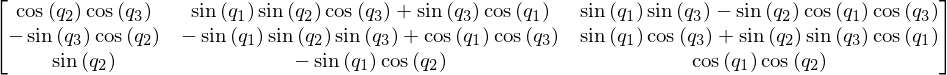

In [6]:
A.dcm(N)

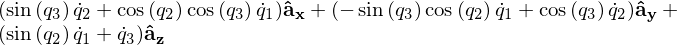

In [7]:
A.ang_vel_in(N)

In [8]:
ueqs = [sm.Eq(u1, A.ang_vel_in(N).dot(A.x)),
        sm.Eq(u2, A.ang_vel_in(N).dot(A.y)),
        sm.Eq(u3, A.ang_vel_in(N).dot(A.z))]
ueqs

# Note that with specific values of some q's there is a divide by zero, i.e. gimbal lock

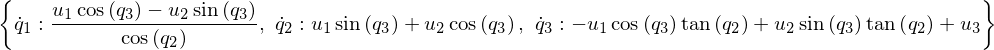

In [9]:
sm.solve(ueqs, q1.diff(), q2.diff(), q3.diff())